In [ ]:
#importing all required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [ ]:
#reading the csv using the pandas read csv function
df =pd.read_csv("/content/creditcard.csv")

# ***DATA_PREPROCESSING:***

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.drop('Time',axis=1,inplace=True)

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
df.isnull().count()

V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [ ]:
#classifying the data according to our requirement

**0 -for non-fraud transation**
 
**1 -for fraud transation**

# **Feature Engineering & Data Visulization** 

In [ ]:
(df['Class']==0).sum()

284315

In [ ]:
(df['Class']==1).sum()

492

In [ ]:
(df['Class'].unique())

array([0, 1])

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
df['Amount'].min()

0.0

In [ ]:
df['Amount'].max()

25691.16

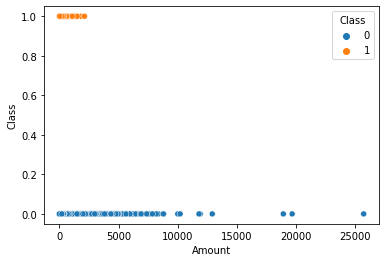

In [ ]:
sns.scatterplot(x='Amount',y='Class',data=df,hue='Class')

In [ ]:
fake =df[df['Class']==1]
nt_fake=df[df['Class']==0]

In [ ]:
fake['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
fake['Amount'].sum()

60127.97

In [ ]:
df['Amount'].sum()

25162590.009999998

In [ ]:
nt_fake['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
nt_fake['Amount'].sum()

25102462.04

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [ ]:
amt=df['Amount'].values
amt=np.reshape(amt,(-1,1))
df['Amount'] =Scaler.fit_transform(amt)

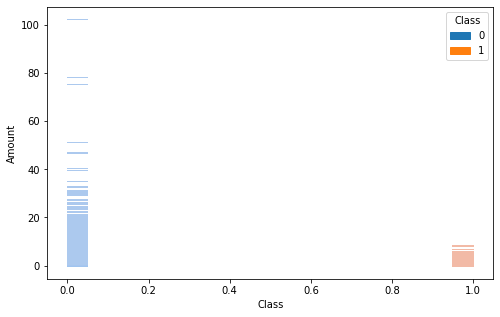

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x='Class',y='Amount',data=df,hue='Class')
sns.set_style('darkgrid')

In [ ]:
#import the sklearn library
#->train test split for spliting traning and testing data 
#->Pipeline is used to increase the efficiency in terms of time and accuracy


In [ ]:
#importing classification Algorithms since we dealing with classification problem (suprvised learing)
->LogisticRegression
->KNeighborsClassifier
->DecisionTreeClassifier
->RandomForestClassifier
->SVC (Support Vector Classifier)

In [ ]:
# Importing metrics modlue for checking the score or model 
->accuracy_score 
->confusion_metrics
->r^2 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
#Dividing the Data set into
->X -- for feature data
->y --for label data

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
print(X_test)

              V1        V2        V3  ...       V27       V28    Amount
183484 -0.323334  1.057455 -0.048341  ...  0.108494  0.161139 -0.193306
255448 -0.349718  0.932619  0.142992  ...  0.076830  0.175562 -0.345313
244749 -1.614711 -2.406570  0.326194  ...  0.286285  0.437322  0.030587
63919  -2.477184  0.860613  1.441850  ... -0.510060 -0.660533  0.878181
11475   1.338831 -0.547264  0.737389  ... -0.002769  0.003272 -0.333239
...          ...       ...       ...  ...       ...       ...       ...
208059 -0.429070  0.712074  0.675855  ... -0.150931 -0.111220 -0.233487
260930 -4.673996 -3.716208 -1.486611  ...  0.973848 -1.566714  1.777950
75125  -1.215390  1.379556  0.438732  ...  0.234356 -0.035339 -0.125338
37292  -0.632439  1.212284  1.388188  ...  0.345269  0.168419 -0.324643
240913 -0.252855  1.854028  0.149808  ...  0.360196  0.206837 -0.310890

[85443 rows x 29 columns]


In [ ]:
X_test.shape

(85443, 29)

# *KNN*

---





In [ ]:
model_knn =KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_knn =model_knn.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_knn))
print('R^2 :',metrics.r2_score(y_test,y_knn))
print('Classification_report :',metrics.classification_report(y_test,y_knn))

Accuracy_Score : 0.9994382219725431
R^2 : 0.672906641553639
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
cm=metrics.confusion_matrix(y_test,y_knn)
print(cm)

[[85289     7]
 [   41   106]]


In [ ]:
error_rate =[]
for i in range(1,15):
  model_knn=KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,y_train)
  pred_i=model_knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

[]

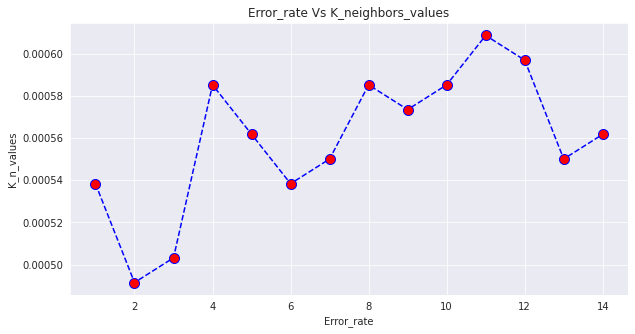

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error_rate Vs K_neighbors_values')
plt.xlabel('Error_rate')
plt.ylabel('K_n_values')
plt.plot()

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_knn_n_2=model_knn.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_knn_n_2))
print('R^2 :',metrics.r2_score(y_test,y_knn_n_2))
print('Classification_report :',metrics.classification_report(y_test,y_knn_n_2))

Accuracy_Score : 0.9995084442259752
R^2 : 0.7137933113594341
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.97      0.73      0.84       147

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# ***LOGISTIC_REGRESSION***
---



In [ ]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
y_LR=model_LR.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_LR))
print('R^2 :',metrics.r2_score(y_test,y_LR))
print('Classification_report :',metrics.classification_report(y_test,y_LR))

Accuracy_Score : 0.999204147794436
R^2 : 0.5366177422009886
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
cm=metrics.confusion_matrix(y_test,y_LR)
cm

array([[85284,    12],
       [   56,    91]])

### ***SVC***

---



In [ ]:
model_svc=SVC()
model_svc.fit(X_train,y_train)
y_svc=model_svc.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_svc))
print('R^2 :',metrics.r2_score(y_test,y_svc))
print('Classification_report :',metrics.classification_report(y_test,y_svc))

Accuracy_Score : 0.9993445923013002
R^2 : 0.6183910818125788
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.65      0.77       147

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
cm=metrics.confusion_matrix(y_test,y_svc)
cm

array([[85291,     5],
       [   51,    96]])

# ***DTC***

---


In [ ]:
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)
y_DTC=model_DTC.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_DTC))
print('R^2 :',metrics.r2_score(y_test,y_DTC))
print('Classification_report :',metrics.classification_report(y_test,y_DTC))

Accuracy_Score : 0.9992626663389628
R^2 : 0.5706899670391512
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# ***Random_F***

---



In [ ]:
model_RTC=RandomForestClassifier()
model_RTC.fit(X_train,y_train)
y_RTC=model_RTC.predict(X_test)

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_DTC))
print('R^2 :',metrics.r2_score(y_test,y_DTC))
print('Classification_report :',metrics.classification_report(y_test,y_DTC))

Accuracy_Score : 0.9992626663389628
R^2 : 0.5706899670391512
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy_Score : 0.9992626663389628
R^2 : 0.5706899670391512
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# ***[PIPELINE])***

In [ ]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVC=Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])

In [ ]:
pipeline1=[pipe_LR,pipe_SVC,pipe_DT,pipe_RF,pipe_Knn]

In [ ]:
pipe_dict={0:'LogisticRegression',1:'KNeighborsClassifier',2:'SVC',3:'DecisionTreeClassifier',4:'RandomForestClassifier'}

In [ ]:
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [ ]:
for i,models in enumerate(pipeline1):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.999204147794436
KNeighborsClassifier Accuracy : 0.9992626663389628
SVC Accuracy : 0.9993094811745842
DecisionTreeClassifier Accuracy : 0.9995201479348805
RandomForestClassifier Accuracy : 0.9994616293903538
